In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# parameters
e = 1
E = 1 # for test 
h_bar = 1 # 6.582E16 #1.055E-34 # J*s per one a.u.
m = 1 # 9.1E-31
k_in = np.sqrt(2*m*E)/h_bar # a.u
k_out = k_in # elastic scattering

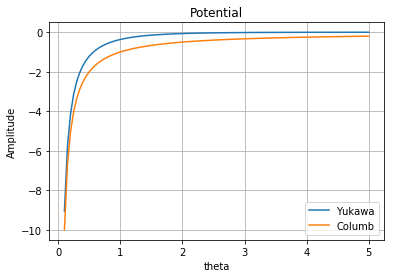

In [3]:
#Yukawa potential 
V0 = 1
mu = 1

V_Yuk = lambda x: -V0*np.exp(-x/mu)/x/mu
r_ = np.linspace(0.1,5,100)

plt.plot(r_,V_Yuk(r_),r_,-1/r_)
plt.title("Potential")
plt.ylabel('Amplitude')
plt.xlabel('theta')
plt.legend(["Yukawa","Columb"])
plt.grid()
plt.show()

In [4]:
#http://farside.ph.utexas.edu/teaching/qmech/Quantum/node133.html
def non_integral_scat_amp(x, q): # ?
    V = V_Yuk(x)
    I = x*V*np.sin(q*x)
    I = - (2*m/np.pi/q/h_bar**2) * I
    return I

In [14]:
# Scattering amplitude calculation
"""
If a detector is at distance 0.3 m and its size 0.5 m then 
the max_scat_angle is approximately pi/3,
but we consider the infinite square detector
"""

theta = np.linspace(0.001, np.pi,100)


"""amp = []
for i in range(len(theta)):
    I,_ = integrate.quad(scat_amp, 0.001, np.inf, args = (q[i]))
    amp.append(I)
    factor = -2*mu/h**2/q[i]
    amp[i] = factor*amp[i]"""

def scat_amp(theta):
    scat_amp = []
    Q = 2*k_in*np.sin(theta/2)
    for q in Q:
        I,_ = integrate.quad(non_integral_scat_amp, 0.001, np.inf, args = (q))
        scat_amp.append(I)
    return scat_amp

#vec_scat_amp = np.vectorize(scat_amp) # vectorization for meshgrid?

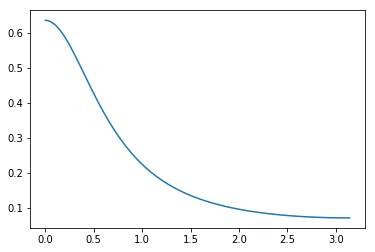

In [15]:
plt.plot(theta,scat_amp(theta))

Text(0.5,0,'$\\theta$, rad')

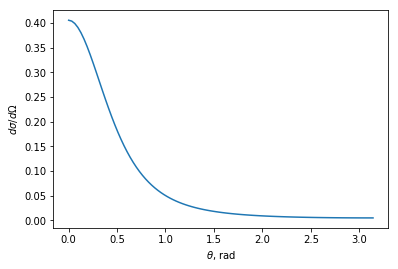

In [17]:
def cross_sec(theta) : return np.power(
    np.abs(scat_amp(theta)),2)

#vec_cross_sec = np.vectorize(cross_sec) # vectorization for meshgrid?

plt.plot(theta,cross_sec(theta))
plt.ylabel(r"$d \sigma / d \Omega$")
plt.xlabel(r'$\theta$, rad')

In [37]:
x = np.array([1,2,3])
y = np.broadcast_to(x,[len(x),len(x)],3)
print(y)

[[1 2 3]
 [1 2 3]
 [1 2 3]]


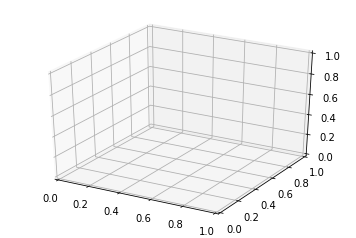

In [38]:
# Check
# 3D surface with polar coordinate
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# mesh in polar coordinate
# we already have the theta
phi = np.linspace(0, 2*np.pi, 100)

THETA, PHI = np.meshgrid(theta, phi)

#print(THETA[0,:])
DIFF_PAT = np.broadcast_to(cross_sec(theta),len(THETA[:,1])) 